# CartPole Introduction

In [1]:
import sys

# Colab setup
if 'google.colab' in sys.modules:
    %pip install -q -U gymnasium
    %pip install -q -U gymnasium[classic_control,box2d,atari,accept-rom-license]
    
from pathlib import Path
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
import gymnasium as gym
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

# Make notebook output stable across runs
random_state = 1000
np.random.seed(random_state)
tf.random.set_seed(random_state)

# Plot settings
%matplotlib inline
sns.set()
mpl.rc('font', size=14)
mpl.rc('axes', labelsize=14, titlesize=14)
mpl.rc('legend', fontsize=14)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
mpl.rc('animation', html='jshtml')

In [2]:
# Utility functions

def print_cart(obs, reward):
    print(f'Last reward: {reward: .1f}')
    print((f'Cart horizontal position: {obs[0]: .3f}\t'
           f'Cart velocity:         {obs[1]: .3f}\n'
           f'Pole angle:               {obs[2]: .3f}\t'
           f'Pole angular velocity: {obs[3]: .3f}\n'))


def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img

## CartPole: Step by Step

At each step, we observe the state of the system:

- The cart's horizontal position
- The cart's velocity
- The angle of the pole in radians (where vertical is 0)
- The pole's angular velocity

In [3]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
obs, info = env.reset(seed=random_state)
obs

array([ 0.00213857,  0.01038418, -0.00290582, -0.02967521], dtype=float32)

In [4]:
print_cart(obs, 0)

Last reward:  0.0
Cart horizontal position:  0.002	Cart velocity:          0.010
Pole angle:               -0.003	Pole angular velocity: -0.030



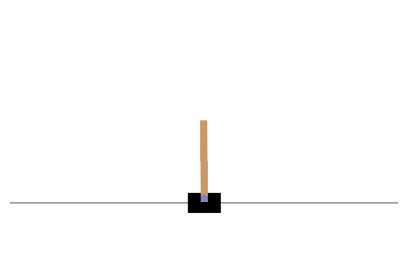

In [5]:
# Visualize the cart
plot_environment(env)
plt.show()

In [6]:
# There are two possible actions
# Action 0 is "push cart to the left"
# Action 1 is "push cart to the right"
env.action_space

Discrete(2)

Take an action, and view the:

- State
- Reward
- Whether the environment has terminated (done or truncated)
- Debugging information

In [7]:
# Push to the right
action = 1
obs, reward, done, truncated, info = env.step(action)
print_cart(obs, reward)

Last reward:  1.0
Cart horizontal position:  0.002	Cart velocity:          0.206
Pole angle:               -0.003	Pole angular velocity: -0.323



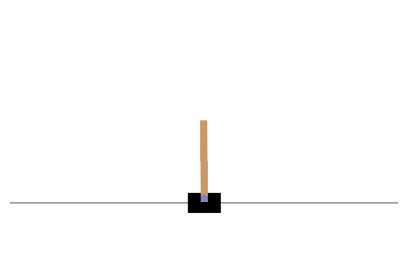

In [8]:
# Visualize the cart
plot_environment(env)
plt.show()

Last reward:  1.0
Cart horizontal position:  0.086	Cart velocity:          1.379
Pole angle:               -0.132	Pole angular velocity: -2.150



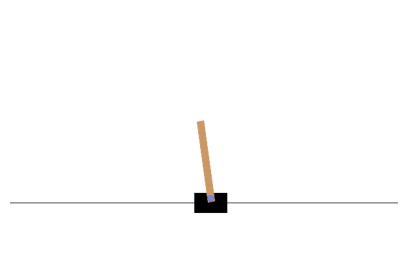

In [9]:
# Push to the right again, this time for six steps
action = 1
for _ in range(6):
    obs, reward, done, truncated, info = env.step(action)
    
print_cart(obs, reward)

# Visualize the cart
plot_environment(env)
plt.show()

In [10]:
# Is the environment done?
done

False

In [11]:
# Is the environment truncated, or stopped "early"?
truncated

False

Last reward:  1.0
Cart horizontal position:  0.113	Cart velocity:          1.575
Pole angle:               -0.175	Pole angular velocity: -2.481



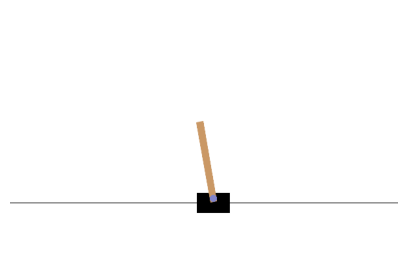

In [12]:
# Push to the right and visualize
action = 1
obs, reward, done, truncated, info = env.step(action)
print_cart(obs, reward)

plot_environment(env)
plt.show()

In [13]:
# Is the environment done?
done

False

Last reward:  1.0
Cart horizontal position:  0.145	Cart velocity:          1.771
Pole angle:               -0.224	Pole angular velocity: -2.822



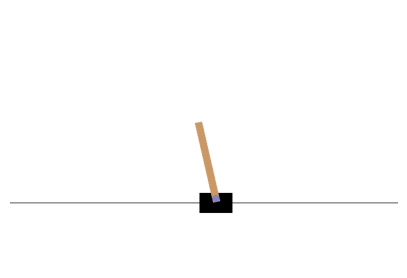

In [14]:
# Push to the right and visualize
action = 1
obs, reward, done, truncated, info = env.step(action)
print_cart(obs, reward)

plot_environment(env)
plt.show()

In [15]:
# Is the environment done?
done

True

## CartPole: Interactive Loop

Step: 1


Action: 0


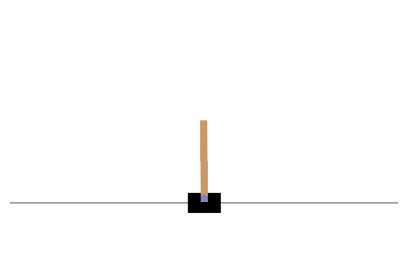

Last reward:  1.0
Cart horizontal position:  0.002	Cart velocity:         -0.185
Pole angle:               -0.003	Pole angular velocity:  0.262

Step: 2


Action: 0


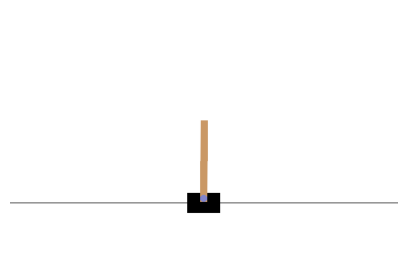

Last reward:  1.0
Cart horizontal position: -0.001	Cart velocity:         -0.380
Pole angle:                0.002	Pole angular velocity:  0.554

Step: 3


Action: 0


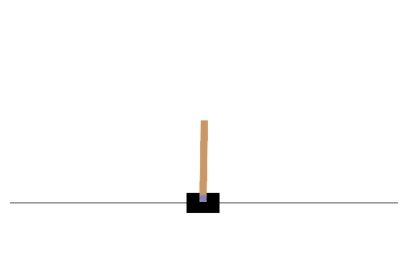

Last reward:  1.0
Cart horizontal position: -0.009	Cart velocity:         -0.575
Pole angle:                0.013	Pole angular velocity:  0.847

Step: 4


Action: 0


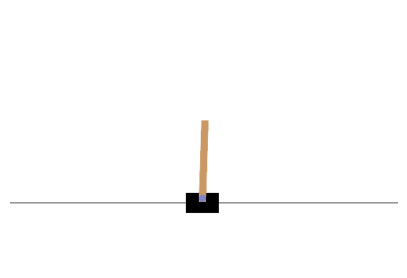

Last reward:  1.0
Cart horizontal position: -0.020	Cart velocity:         -0.770
Pole angle:                0.030	Pole angular velocity:  1.144

Step: 5


Action: 0


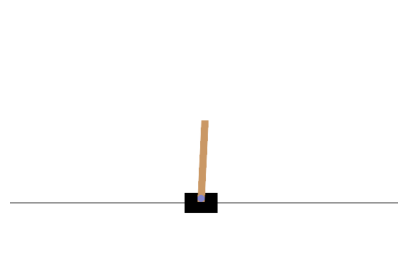

Last reward:  1.0
Cart horizontal position: -0.036	Cart velocity:         -0.966
Pole angle:                0.053	Pole angular velocity:  1.445

Step: 6


Action: 0


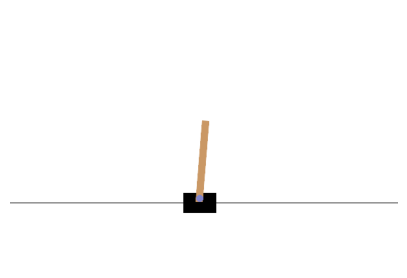

Last reward:  1.0
Cart horizontal position: -0.055	Cart velocity:         -1.161
Pole angle:                0.082	Pole angular velocity:  1.754

Step: 7


Action: 1


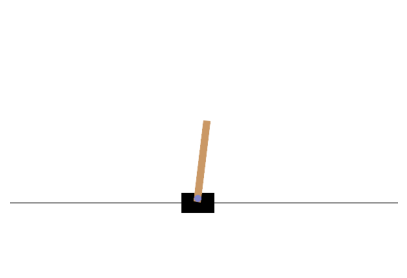

Last reward:  1.0
Cart horizontal position: -0.078	Cart velocity:         -0.967
Pole angle:                0.117	Pole angular velocity:  1.488

Step: 8


Action: 1


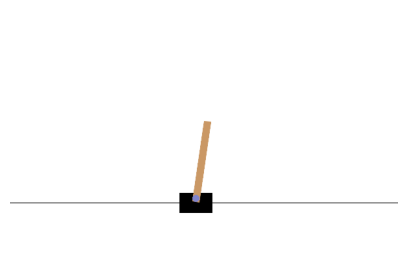

Last reward:  1.0
Cart horizontal position: -0.098	Cart velocity:         -0.774
Pole angle:                0.146	Pole angular velocity:  1.234

Step: 9


Action: 1


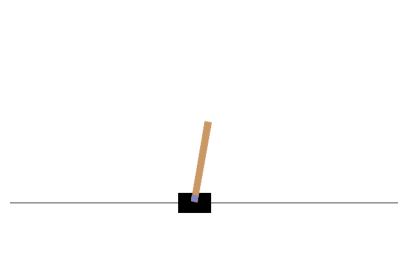

Last reward:  1.0
Cart horizontal position: -0.113	Cart velocity:         -0.581
Pole angle:                0.171	Pole angular velocity:  0.990

Step: 10


Action: 1


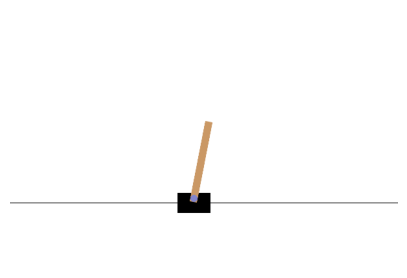

Last reward:  1.0
Cart horizontal position: -0.125	Cart velocity:         -0.388
Pole angle:                0.191	Pole angular velocity:  0.756

Step: 11


Action: 1


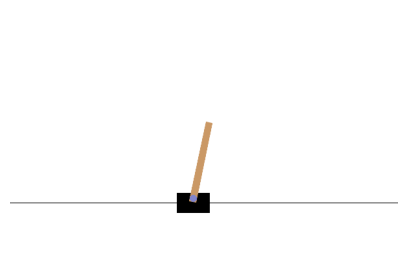

Last reward:  1.0
Cart horizontal position: -0.133	Cart velocity:         -0.196
Pole angle:                0.206	Pole angular velocity:  0.529

Step: 12


Action: 1


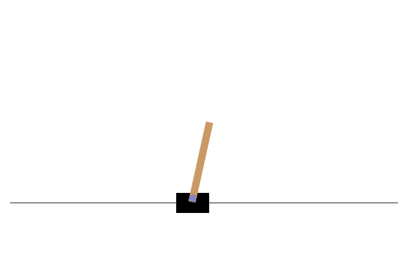

Last reward:  1.0
Cart horizontal position: -0.137	Cart velocity:         -0.005
Pole angle:                0.217	Pole angular velocity:  0.307

Episode complete


In [16]:
env.reset(seed=random_state)

step = 0
while True:
    step = step + 1
    print(f'Step: {step}')
    action = int(input('Action:'))
    if action in (0, 1):
        obs, reward, done, truncated, info = env.step(action)
    plot_environment(env)
    plt.show()
        
    print_cart(obs, reward)
    
    if done:
        print('Episode complete')
        break    